In [511]:
from sympy import symbols, Function, diff, sqrt, exp, pi, integrate, dsolve, oo, Piecewise
import numpy as np
import sympy as sp
from sympy.utilities import lambdify

sp.init_printing()

# Definicja zmiennych
t = sp.Symbol('t', real = True, positive = True)
m = sp.Symbol('m', real = True, positive = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
h_bar = sp.Symbol('hbar', real = True, positive = True)
x = sp.Symbol('x', real = True)
n = sp.Symbol('n', integer = True, nonzero = True)
psi = sp.Function('psi', real = True)

In [512]:
# Potencjał studni potencjału
V = Piecewise((0, (0 <= x) & (x <= a)), (oo, True))
V 

⎧0  for a ≥ x ∧ x ≥ 0
⎨                    
⎩∞      otherwise    

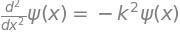

In [513]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [514]:
sp.dsolve(eq, psi(x))

In [515]:
sp.dsolve(eq, psi(x), ics={psi(0): 0, psi(a): 0})

In [516]:
sol = sp.dsolve(eq, psi(x), ics={psi(0):0})


In [517]:
sol = sol.subs(k, n* sp.pi / a)
sol

In [518]:
sol.lhs, sol.rhs

In [519]:
sp.Abs(sol.rhs)**2

In [520]:
sp.integrate((sol.rhs)**2, (x, 0, a))

In [521]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2/a))
sol

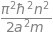

In [522]:
En = n**2 * sp.pi**2 * h**2 / (2*m*a**2)
En

In [523]:
phi = sp.exp(-sp.I *En*t/h)
phi

In [524]:
Psi = sol.rhs * phi
Psi

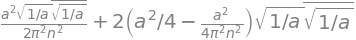

In [525]:
x_average = integrate(sol.rhs.conjugate() * x * sol.rhs, (x, 0, a))
x_average

In [526]:
# Wartość oczekiwana pędu
p_average = integrate(sol.rhs.conjugate() * (-sp.I * h_bar * diff(sol.rhs, x)), (x, 0, a))
p_average

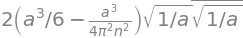

In [527]:
x_square_average = integrate(sol.rhs.conjugate() * x *x * sol.rhs, (x, 0, a))
x_square_average

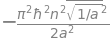

In [528]:
p_square_average = p_squared_average = integrate(sol.rhs.conjugate() * (-sp.I * h_bar * diff(sol.rhs, x)) * sol.rhs.conjugate() * (-sp.I * h_bar * diff(sol.rhs, x)), (x, 0, a))
p_square_average

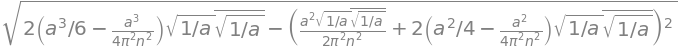

In [529]:
x_probability = sp.sqrt(x_square_average - x_average * x_average)
x_probability

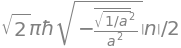

In [530]:
p_probability = sp.sqrt(p_square_average - p_average * p_average)
p_probability

In [531]:
nieoznaczonosc = x_probability * p_probability

# Sprawdź, czy nieoznaczoność jest mniejsza lub równa h_bar/2
warunek = nieoznaczonosc >= sp.Rational(1, 2) * h_bar

# Sprawdź, czy warunek jest spełniony
czy_spelniony = sp.solve(warunek)

# Zwróć wynik jako True lub False
print(bool(czy_spelniony))

True
